In [27]:
!pip install -q tflite-model-maker

In [28]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [29]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d gpiosenka/100-bird-species
#!unzip 100-bird-species.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
100-bird-species.zip: Skipping, found more recently modified local copy (use --force to force download)


In [30]:
import zipfile
with zipfile.ZipFile('100-bird-species.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

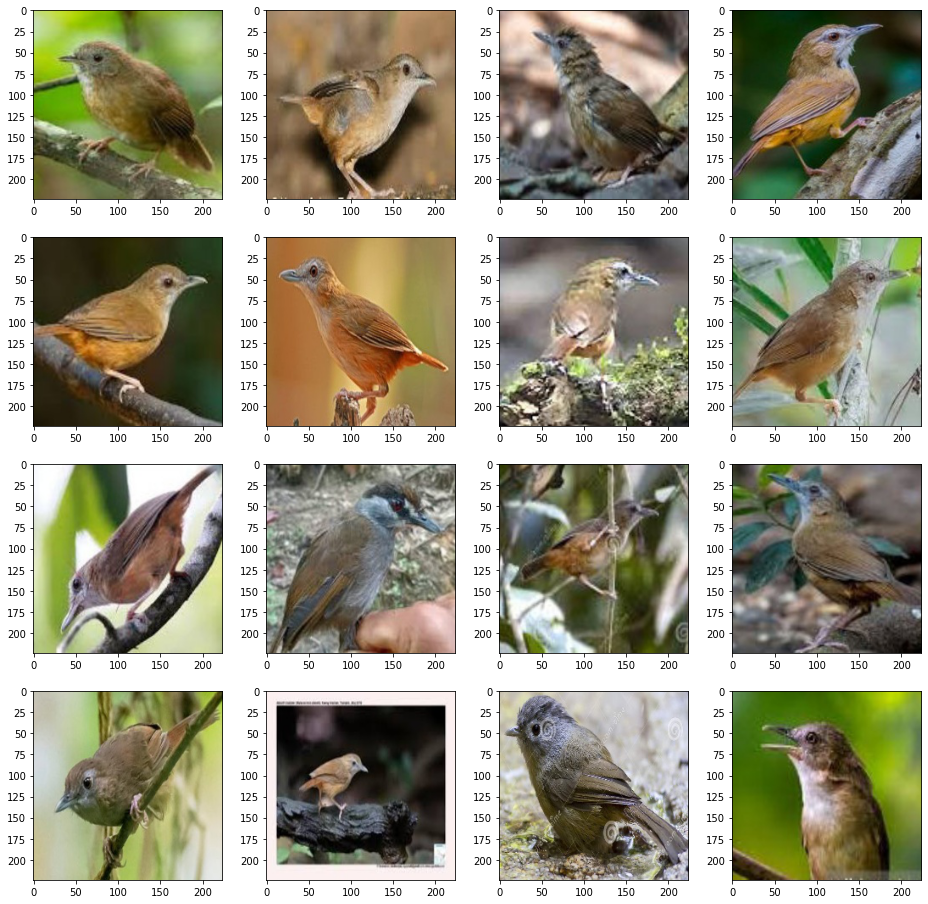

In [32]:
nrows = 4
ncols = 4
imagenames = os.listdir(os.path.join("train", "ABBOTTS BABBLER"))

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

next_images = [os.path.join(os.path.join("train", "ABBOTTS BABBLER"), fname) for fname in imagenames[:int(ncols*nrows)]]

for i, img_path in enumerate(next_images):
    sp = plt.subplot(nrows, ncols, i + 1)
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [33]:
data = DataLoader.from_folder('train')
train_data, test_data = data.split(0.9)

#train_data, rest_data = data.split(0.8)
#validation_data, test_data = rest_data.split(0.5)

INFO:tensorflow:Load image with size: 58388, num_label: 400, labels: ABBOTTS BABBLER, ABBOTTS BOOBY, ABYSSINIAN GROUND HORNBILL, AFRICAN CROWNED CRANE, AFRICAN EMERALD CUCKOO, AFRICAN FIREFINCH, AFRICAN OYSTER CATCHER, ALBATROSS, ALBERTS TOWHEE, ALEXANDRINE PARAKEET, ALPINE CHOUGH, ALTAMIRA YELLOWTHROAT, AMERICAN AVOCET, AMERICAN BITTERN, AMERICAN COOT, AMERICAN GOLDFINCH, AMERICAN KESTREL, AMERICAN PIPIT, AMERICAN REDSTART, AMETHYST WOODSTAR, ANDEAN GOOSE, ANDEAN LAPWING, ANDEAN SISKIN, ANHINGA, ANIANIAU, ANNAS HUMMINGBIRD, ANTBIRD, ANTILLEAN EUPHONIA, APAPANE, APOSTLEBIRD, ARARIPE MANAKIN, ASHY THRUSHBIRD, ASIAN CRESTED IBIS, AVADAVAT, AZURE JAY, AZURE TANAGER, AZURE TIT, BAIKAL TEAL, BALD EAGLE, BALD IBIS, BALI STARLING, BALTIMORE ORIOLE, BANANAQUIT, BAND TAILED GUAN, BANDED BROADBILL, BANDED PITA, BANDED STILT, BAR-TAILED GODWIT, BARN OWL, BARN SWALLOW, BARRED PUFFBIRD, BARROWS GOLDENEYE, BAY-BREASTED WARBLER, BEARDED BARBET, BEARDED BELLBIRD, BEARDED REEDLING, BELTED KINGFISHER, B

INFO:tensorflow:Load image with size: 58388, num_label: 400, labels: ABBOTTS BABBLER, ABBOTTS BOOBY, ABYSSINIAN GROUND HORNBILL, AFRICAN CROWNED CRANE, AFRICAN EMERALD CUCKOO, AFRICAN FIREFINCH, AFRICAN OYSTER CATCHER, ALBATROSS, ALBERTS TOWHEE, ALEXANDRINE PARAKEET, ALPINE CHOUGH, ALTAMIRA YELLOWTHROAT, AMERICAN AVOCET, AMERICAN BITTERN, AMERICAN COOT, AMERICAN GOLDFINCH, AMERICAN KESTREL, AMERICAN PIPIT, AMERICAN REDSTART, AMETHYST WOODSTAR, ANDEAN GOOSE, ANDEAN LAPWING, ANDEAN SISKIN, ANHINGA, ANIANIAU, ANNAS HUMMINGBIRD, ANTBIRD, ANTILLEAN EUPHONIA, APAPANE, APOSTLEBIRD, ARARIPE MANAKIN, ASHY THRUSHBIRD, ASIAN CRESTED IBIS, AVADAVAT, AZURE JAY, AZURE TANAGER, AZURE TIT, BAIKAL TEAL, BALD EAGLE, BALD IBIS, BALI STARLING, BALTIMORE ORIOLE, BANANAQUIT, BAND TAILED GUAN, BANDED BROADBILL, BANDED PITA, BANDED STILT, BAR-TAILED GODWIT, BARN OWL, BARN SWALLOW, BARRED PUFFBIRD, BARROWS GOLDENEYE, BAY-BREASTED WARBLER, BEARDED BARBET, BEARDED BELLBIRD, BEARDED REEDLING, BELTED KINGFISHER, B

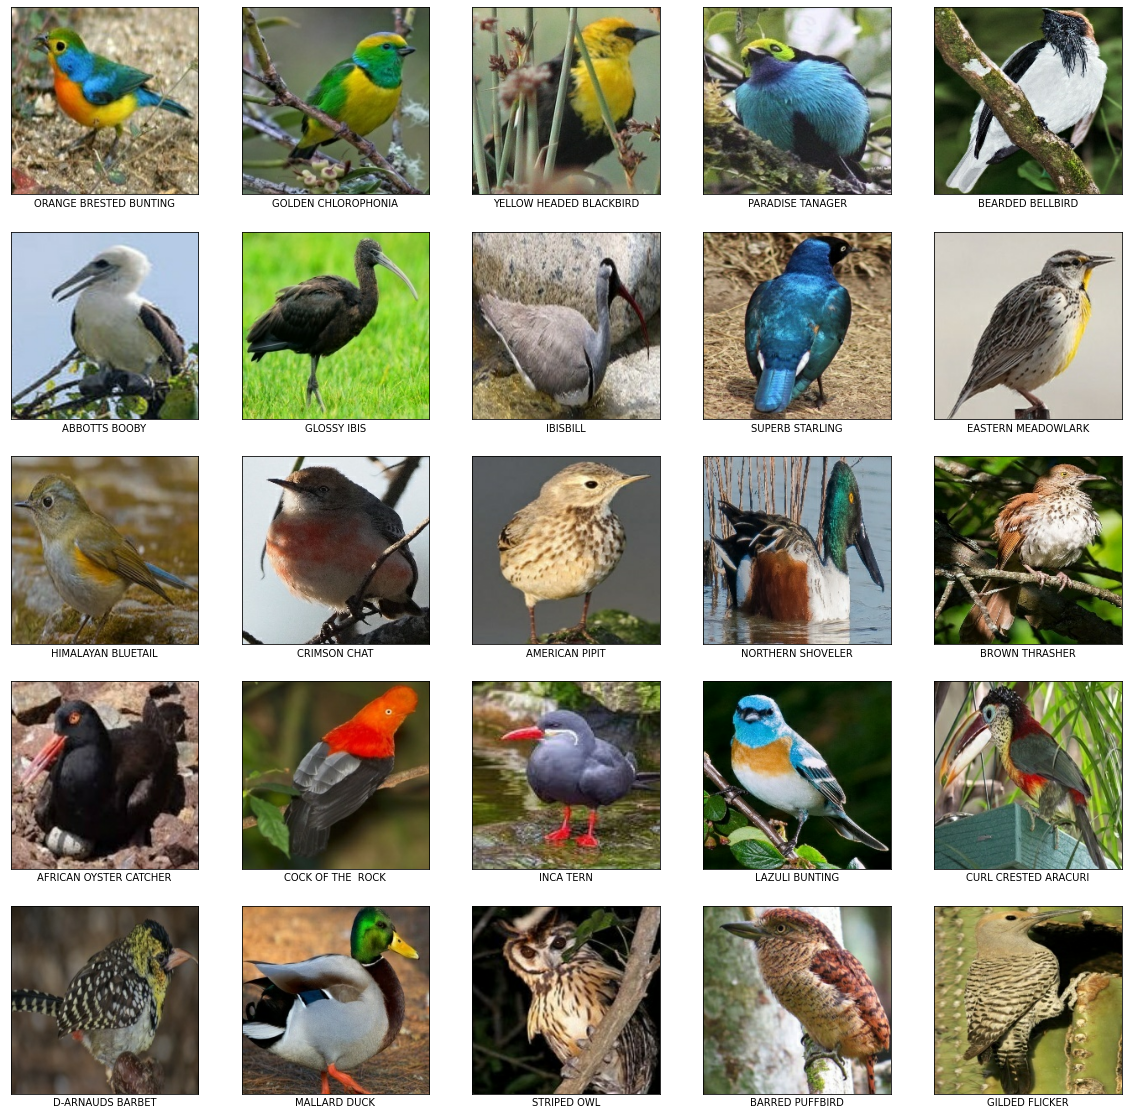

In [40]:
plt.figure(figsize=(20,20))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [34]:
model = image_classifier.create(train_data)
#model = image_classifier.create(train_data, validation_data=validation_data)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_1 (Hub  (None, 1280)             3413024   
 KerasLayerV1V2)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 400)               512400    
                                                                 
Total params: 3,925,424
Trainable params: 512,400
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1642/1642 [==============================] - 116s 69ms/step - loss: 3.9665 - accuracy: 0.4864
Epoch 2/5
1642/1642 [==============================] - 109s 67ms/step - loss: 2.2502 - accuracy: 0.8265
Epoch 3/5
1642/1642 [==============================] - 109s 66ms/step - loss: 1.9057 - accuracy: 0.8721
Epoch 4/5
1642/1642 [==============================] - 109s 66ms/step - loss: 1.7820 - accuracy: 0.8933
Epoch 5/5
1642/1642 [==============================] - 109s 66ms/step - loss: 1.7169 - accuracy: 0.9047


In [35]:
loss, accuracy = model.evaluate(test_data)

183/183 [==============================] - 34s 66ms/step - loss: 1.7457 - accuracy: 0.8947


In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_1 (Hub  (None, 1280)             3413024   
 KerasLayerV1V2)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 400)               512400    
                                                                 
Total params: 3,925,424
Trainable params: 512,400
Non-trainable params: 3,413,024
_________________________________________________________________


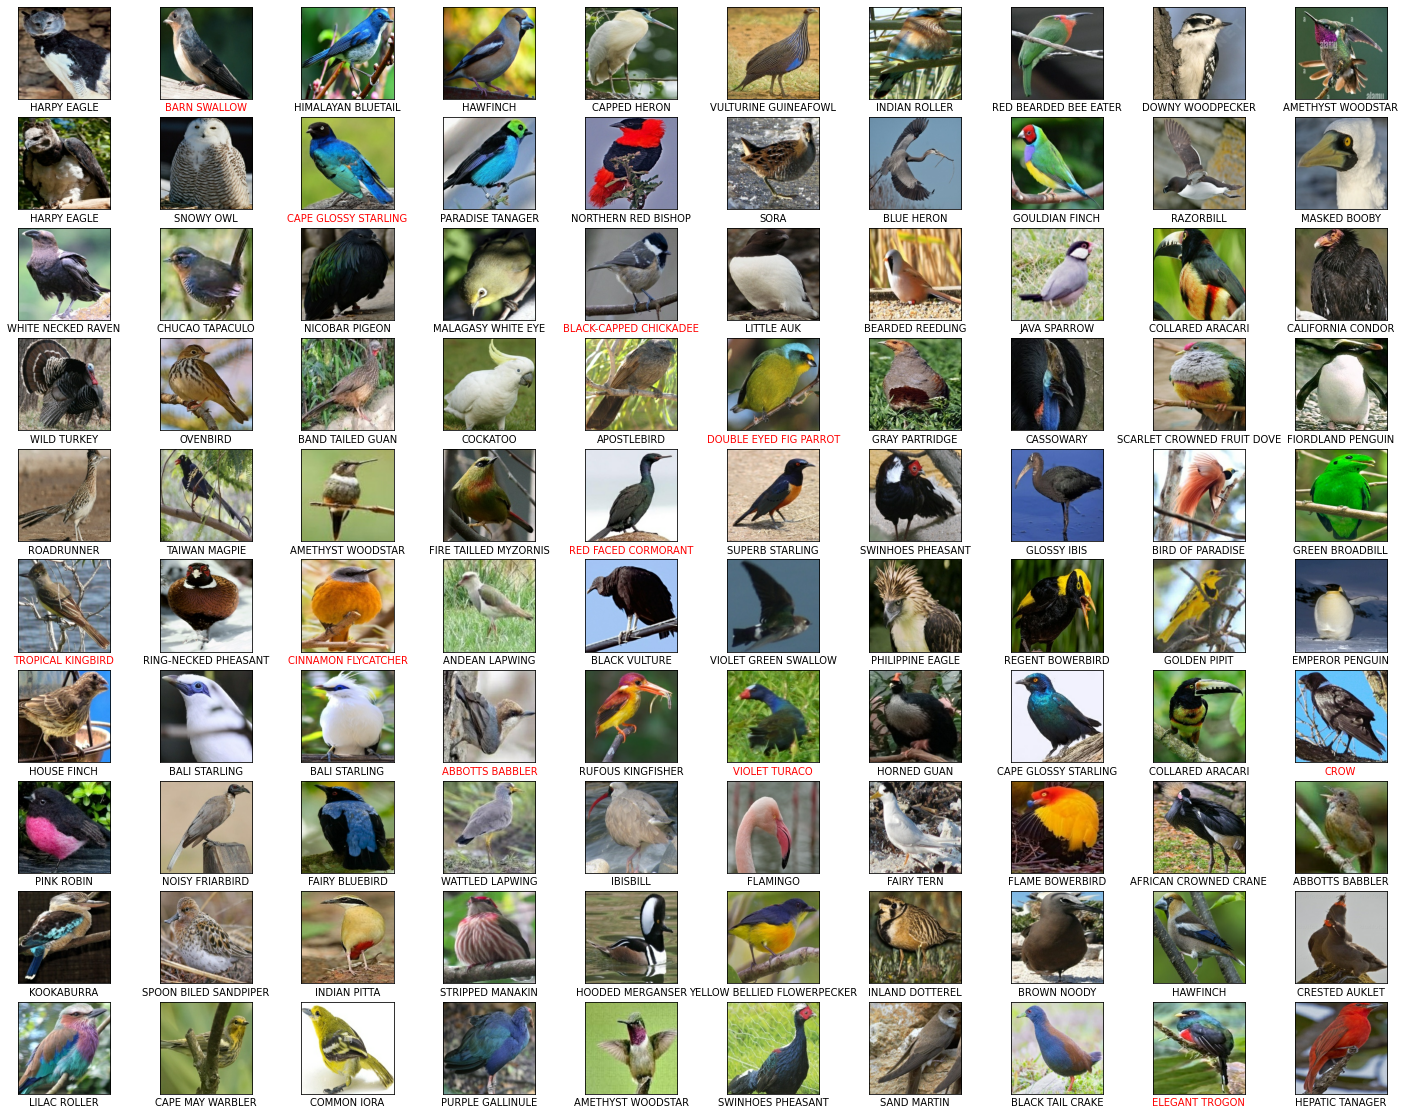

In [44]:
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

plt.figure(figsize=(25, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel(predict_label)
plt.show()

In [38]:
model.export(export_dir='.', tflite_filename='birds.tflite')

INFO:tensorflow:Assets written to: /tmp/tmpfs1y_r4x/assets


INFO:tensorflow:Assets written to: /tmp/tmpfs1y_r4x/assets
/usr/local/lib/python3.7/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmp8dsksomt/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmp8dsksomt/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: content/birds.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: content/birds.tflite
